In [11]:
# Code edited from source : https://www.kaggle.com/nautna/iris-knn-python-classification
# kNN here is used to classify three different flowers based on four features. 

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# read in data
df = pd.read_csv('data/iris.csv')
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
0      1            5.1           3.5            1.4           0.2      setosa
1      2            4.9           3.0            1.4           0.2      setosa
2      3            4.7           3.2            1.3           0.2      setosa
3      4            4.6           3.1            1.5           0.2      setosa
4      5            5.0           3.6            1.4           0.2      setosa
5      6            5.4           3.9            1.7           0.4      setosa
6      7            4.6           3.4            1.4           0.3      setosa
7      8            5.0           3.4            1.5           0.2      setosa
8      9            4.4           2.9            1.4           0.2      setosa
9     10            4.9           3.1            1.5           0.1      setosa
10    11            5.4           3.7            1.5           0.2      setosa
11    12            4.8           3.4            1.6

In [14]:
# preview dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [15]:
pd.set_option('display.max_rows', None) #Warning: shows ALL rows
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
0      1            5.1           3.5            1.4           0.2      setosa
1      2            4.9           3.0            1.4           0.2      setosa
2      3            4.7           3.2            1.3           0.2      setosa
3      4            4.6           3.1            1.5           0.2      setosa
4      5            5.0           3.6            1.4           0.2      setosa
5      6            5.4           3.9            1.7           0.4      setosa
6      7            4.6           3.4            1.4           0.3      setosa
7      8            5.0           3.4            1.5           0.2      setosa
8      9            4.4           2.9            1.4           0.2      setosa
9     10            4.9           3.1            1.5           0.1      setosa
10    11            5.4           3.7            1.5           0.2      setosa
11    12            4.8           3.4            1.6

In [16]:
# numerical statistics of dataset
round(df.describe(),1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.0,150.0,150.0,150.0,150.0
mean,75.5,5.8,3.1,3.8,1.2
std,43.4,0.8,0.4,1.8,0.8
min,1.0,4.3,2.0,1.0,0.1
25%,38.2,5.1,2.8,1.6,0.3
50%,75.5,5.8,3.0,4.4,1.3
75%,112.8,6.4,3.3,5.1,1.8
max,150.0,7.9,4.4,6.9,2.5


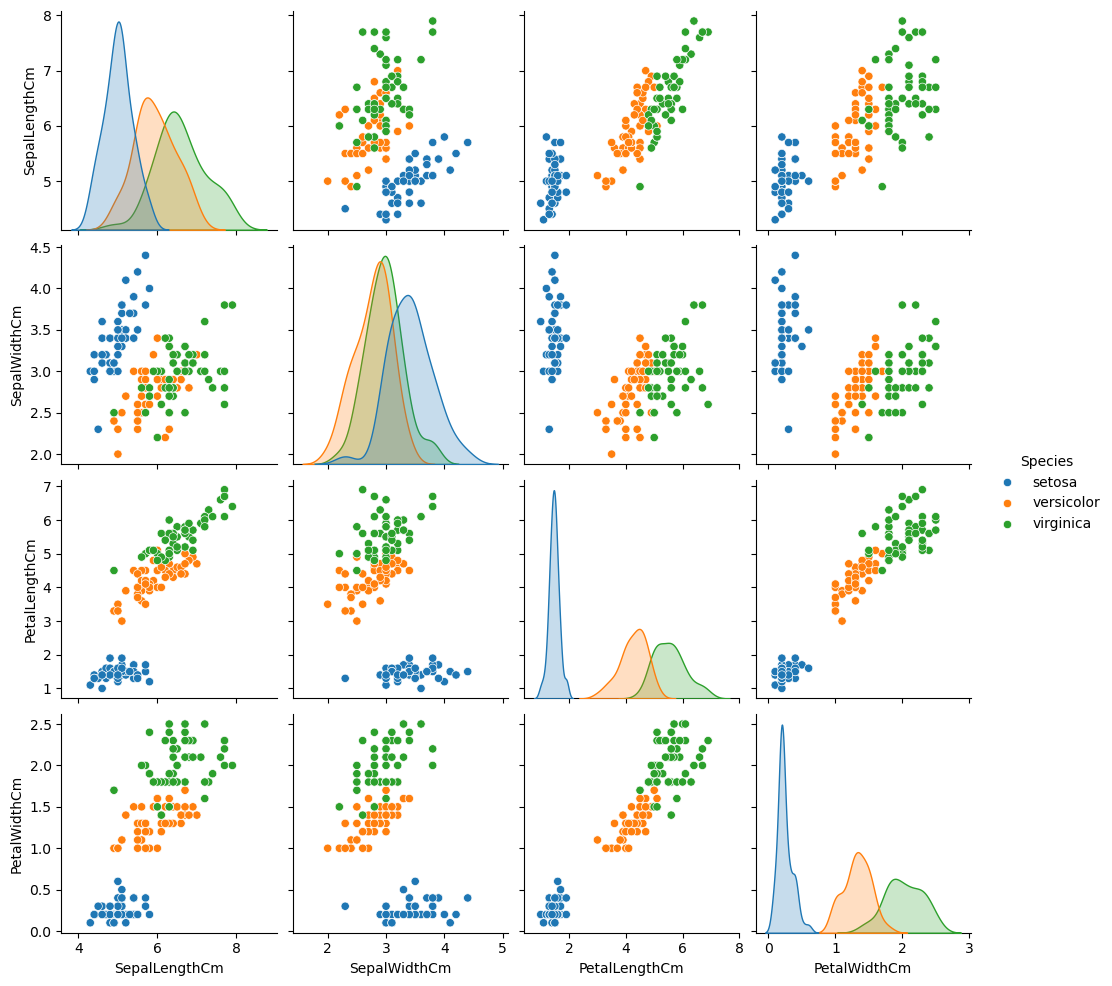

In [17]:
# view the relationships between variables; color code by species type
sns.pairplot(df.drop(labels=['Id'], axis=1), hue='Species')

In [18]:
#### Splits data into training and test sets 
## param random_state: to make your tests reproducible, you need a random split with the same output 
#   for each function call. The splitting data process in train and test is randomised 
#   which means you would get different data assigned to the train and test data ech 
#   time unless you can control for the random generator. 
#   The attribute random_state is used to set the seed for the random generator. This 
#   ensures that the recieved results can be reproduced. The value of random_state is NOT 
#   important, but it has to be an integer  > 0 
#   If you want randomness the choose None 
#
## param test_size: The number that defines the size of the test set. Provide either train_size or test_size. 
#    If neither is given, then the default share of the dataset for testing is 0.25, or 25 percent.
# X is the input features, and y is the target classes (or labels)
X_train, X_test, y_train, y_test = train_test_split(df[['SepalLengthCm', 'SepalWidthCm', 
                                                        'PetalLengthCm', 'PetalWidthCm']],
                                                    df['Species'], random_state=123, test_size=0.25)

In [19]:
# see how data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [20]:
# Display the training data!
print(X_train, y_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
16             5.4           3.9            1.3           0.4
82             5.8           2.7            3.9           1.2
60             5.0           2.0            3.5           1.0
35             5.0           3.2            1.2           0.2
143            6.8           3.2            5.9           2.3
145            6.7           3.0            5.2           2.3
142            5.8           2.7            5.1           1.9
114            5.8           2.8            5.1           2.4
136            6.3           3.4            5.6           2.4
53             5.5           2.3            4.0           1.3
19             5.1           3.8            1.5           0.3
38             4.4           3.0            1.3           0.2
110            6.5           3.2            5.1           2.0
23             5.1           3.3            1.7           0.5
9              4.9           3.1            1.5           0.1
86      

In [21]:
# Display the TEST data!
#print(len(X_test))
print(y_test)


72     versicolor
112     virginica
132     virginica
88     versicolor
37         setosa
138     virginica
87     versicolor
42         setosa
8          setosa
90     versicolor
141     virginica
33         setosa
59     versicolor
116     virginica
135     virginica
104     virginica
36         setosa
13         setosa
63     versicolor
45         setosa
28         setosa
133     virginica
24         setosa
127     virginica
46         setosa
20         setosa
31         setosa
121     virginica
117     virginica
4          setosa
130     virginica
119     virginica
29         setosa
0          setosa
62     versicolor
93     versicolor
131     virginica
5          setosa
Name: Species, dtype: object


In [22]:
# initialize the Estimator object
# create an instance of the KNeighborsClassifier class (scikit-learn), with the k number of neighbors
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

**k-nearest neighbors**

based on the pair plots above, the classes are clustered in a way which will be suitable for k-nearest neighbors

In [23]:
# fit the model to training set in order to predict classes later
# The fit method in k-NN stores the training data (X_train and y_train) within the classifier object. 
# Unlike many other machine learning algorithms, k-NN doesn't perform any complex computations or model training 
# during this step. It just memorizes the training dataset.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# The process of finding the nearest neighbors occurs!! Create a prediction array y_pred for our test set
y_pred = knn.predict(X_test)
print(y_pred)
#df['Species']

['virginica' 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'setosa']


In [25]:
#confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

print (confusion_matrix)

Predicted   setosa  versicolor  virginica
Actual                                   
setosa          16           0          0
versicolor       0           7          1
virginica        0           1         13


In [26]:
# based on the training dataset, our model predicts the following for the test set:
pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], 
          ignore_index=False, axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
72,6.3,2.5,4.9,1.5,versicolor,virginica
112,6.8,3.0,5.5,2.1,virginica,virginica
132,6.4,2.8,5.6,2.2,virginica,virginica
88,5.6,3.0,4.1,1.3,versicolor,versicolor
37,4.9,3.1,1.5,0.1,setosa,setosa
138,6.0,3.0,4.8,1.8,virginica,virginica
87,6.3,2.3,4.4,1.3,versicolor,versicolor
42,4.4,3.2,1.3,0.2,setosa,setosa
8,4.4,2.9,1.4,0.2,setosa,setosa
90,5.5,2.6,4.4,1.2,versicolor,versicolor


In [27]:
#  Compute the ACCURACY measurement of this model 
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.95
